In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        '''
        self.hiddenLayerSize_4 = 4
        self.hiddenLayerSize_10 = 10
        '''
        np.random.seed(7)
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        
   
    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1, dJdW2

    
    def forwardRelu(self, X):
        #Propagate inputs through network
        self.z2_relu  = np.dot(X,self.W1)
        self.a2_relu = self.relu(self.z2_relu)
        self.z3_relu = np.dot(self.a2_relu,self.W2)
        yHat_relu = self.relu(self.z3_relu)
        return yHat_relu
    

    def costFunctionRelu(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat_relu=self.forwardRelu(X)
        J_relu=0.5*sum((y-self.yHat_relu)**2)
        return J_relu
    
    def costFunctionPrimeRelu(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat_relu=self.forwardRelu(X)
        
        delta3_relu = np.multiply(-(y-self.yHat_relu),self.reluPrime(self.z3_relu))
        dJdW2_relu=np.dot(self.a2_relu.T, delta3_relu)
        
        delta2_relu=np.dot(delta3_relu,self.W2.T)*self.reluPrime(self.z3_relu)
        dJdW1_relu=np.dot(X.T,delta2_relu)
        return dJdW1_relu, dJdW2_relu

In [2]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [3]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [4]:
y

array([[75.],
       [80.],
       [93.]])

In [5]:
X=X/np.amax(X,axis=0)
y=y/100

In [6]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [7]:
NN=Neural_Network()

In [8]:
yH=NN.forward(X)

In [9]:
yH

array([[0.63946727],
       [0.61672017],
       [0.62256371]])

In [10]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

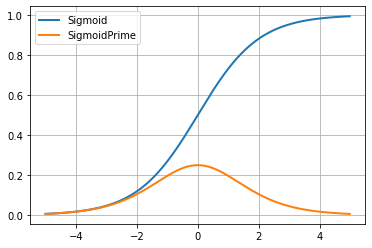

In [11]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])
#u=NN.sigmoidPrime(testValues)


In [12]:
NN=Neural_Network()

In [13]:
cost1=NN.costFunction(X,y)

In [14]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [15]:
dJdW1

array([[-0.01246778, -0.00149081, -0.0063789 ],
       [-0.0056508 , -0.00067493, -0.00299872]])

In [16]:
dJdW2

array([[-0.08101936],
       [-0.09992943],
       [-0.08777346]])

In [17]:
scalar=3
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.07016303] [0.17120053]


In [18]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.17120053] [0.07016303]


## Problem 1: Understand the stucture of a neural network

In [19]:
NN_p1 = Neural_Network()
scalar = 0.25
costs_p1 = []
for i in np.arange(0,1000):
    cost_i_p1 = NN_p1.costFunction(X,y)
    costs_p1 = np.append(costs_p1, cost_i_p1)
    dJdW1, dJdW2 = NN_p1.costFunctionPrime(X,y)
    NN_p1.W1 = NN_p1.W1 - scalar*dJdW1
    NN_p1.W2 = NN_p1.W2 - scalar*dJdW2
costs_p1

array([0.07016303, 0.06422766, 0.05899456, 0.05437028, 0.05027427,
       0.04663732, 0.04339998, 0.04051118, 0.03792707, 0.03560994,
       0.0335273 , 0.03165111, 0.02995713, 0.02842438, 0.0270346 ,
       0.02577193, 0.02462252, 0.02357426, 0.02261653, 0.02174   ,
       0.02093646, 0.02019865, 0.01952016, 0.0188953 , 0.018319  ,
       0.01778677, 0.0172946 , 0.01683888, 0.01641641, 0.0160243 ,
       0.01565995, 0.01532102, 0.01500541, 0.01471121, 0.0144367 ,
       0.01418031, 0.01394062, 0.01371635, 0.01350631, 0.01330944,
       0.01312477, 0.01295138, 0.01278848, 0.0126353 , 0.01249116,
       0.01235542, 0.01222752, 0.0121069 , 0.01199308, 0.01188561,
       0.01178406, 0.01168804, 0.0115972 , 0.01151121, 0.01142975,
       0.01135254, 0.01127931, 0.01120983, 0.01114385, 0.01108117,
       0.01102159, 0.01096492, 0.010911  , 0.01085965, 0.01081073,
       0.01076409, 0.01071962, 0.01067718, 0.01063666, 0.01059795,
       0.01056095, 0.01052556, 0.0104917 , 0.01045929, 0.01042

### Question a) Write a program that minimizes the cost function to a given accuracy set in advance by you.

In [20]:
yHat_1 = np.array(NN_p1.forward(X))
accuracy_1 = 1 - np.mean(np.abs(yHat_1 - y))
accuracy_1

0.9429925275584631

In [21]:
#i feel like there should be something else here but i don't know what to code

### Question b) Plot the cost vs. iteration and see if you get a similar figure to the one shown above. Scalar is a parameter that allows you to change the step of the iteration.

Text(0.5, 1.0, 'Sigmoid Cost vs. Iteration Number, scalar = 0.25')

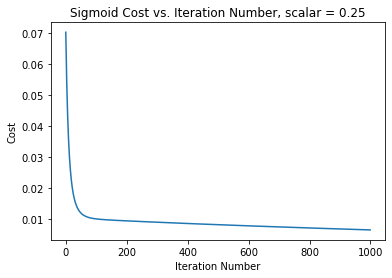

In [22]:
plt.plot(np.arange(0, len(costs_p1)), costs_p1)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Sigmoid Cost vs. Iteration Number, scalar = 0.25')

## Problem 2: Use ReLu instead of sigmoid activation

### Use the ReLu activation function instead of the sigmoid function. Compare how fast this neural network works with the one that uses the sigmoid function activation. 

In [23]:
NN_p2 = Neural_Network()
            
costs_p2 = []

for i in np.arange(0,1000):
    cost_i_p2= NN_p2.costFunctionRelu(X, y)
    costs_p2= np.append(costs_p2,cost_i_p2)
    
    dJdW1_relu, dJdW2_relu = NN_p2.costFunctionPrimeRelu(X, y)
    
    NN_p2.W1 = NN_p2.W1 - scalar*dJdW1_relu
    NN_p2.W2 = NN_p2.W2 - scalar*dJdW2_relu
    
costs_p2

array([0.35463181, 0.15142702, 0.12232475, 0.10511913, 0.09260116,
       0.08268489, 0.07462437, 0.06798452, 0.06246593, 0.05785008,
       0.05397144, 0.05070165, 0.04793904, 0.04560172, 0.04362282,
       0.04194703, 0.04052824, 0.03932764, 0.03831248, 0.03745491,
       0.03673125, 0.03612129, 0.0356078 , 0.03517605, 0.03481349,
       0.03450939, 0.03425464, 0.03404148, 0.03386331, 0.03371456,
       0.03359049, 0.03348711, 0.03340104, 0.03332944, 0.03326994,
       0.03322051, 0.03317949, 0.03314547, 0.03311727, 0.0330939 ,
       0.03307455, 0.03305853, 0.03304528, 0.03303432, 0.03302526,
       0.03301778, 0.03301159, 0.03300648, 0.03300226, 0.03299877,
       0.0329959 , 0.03299352, 0.03299157, 0.03298995, 0.03298862,
       0.03298752, 0.03298661, 0.03298586, 0.03298525, 0.03298474,
       0.03298432, 0.03298398, 0.03298369, 0.03298346, 0.03298326,
       0.0329831 , 0.03298297, 0.03298286, 0.03298278, 0.0329827 ,
       0.03298264, 0.03298259, 0.03298255, 0.03298252, 0.03298

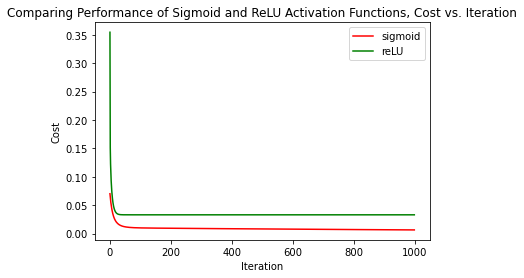

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math


X = np.arange(0, len(costs_p1))

sigmoid_1 = costs_p1
relu_2 = costs_p2

#figure, axis = plt.subplots(1, 2)

plt.plot(X, sigmoid_1, color='r', label='sigmoid')
plt.plot(X, relu_2, color='g', label='reLU')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Comparing Performance of Sigmoid and ReLU Activation Functions, Cost vs. Iteration")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()


### Add a new hidden layer and compare with the previous network. 

In [25]:
'''
class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize = 3
        
        np.random.seed(7)
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        
        self.z4 = np.dot(X, self.W2)
        self.a4 = self.sigmoid(self.z4)
        self.z5 = np.dot(self.a4, self.W3)
        
        yHat = self.sigmoid(self.z5)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1, dJdW2

    def forwardRelu(self, X):
        #Propagate inputs through network
        self.z2_relu = np.dot(X, self.W1)
        self.a2_relu = self.relu(self.z2_relu)
        self.z3_relu = np.dot(self.a2_relu,self.W2)
        
        self.z4_relu = np.dot(X, self.W2)
        self.a4_relu = self.relu(self.z4_relu)
        self.z5_relu = np.dot(self.a4_relu, self.W3)
        
        yHat_relu = self.relu(self.z5_relu)
        return yHat_relu
    

    def costFunctionRelu(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat_relu=self.forwardRelu(X)
        J_relu= 0.5*sum((y - self.yHat_relu)**2)
        return J_relu
    
    def costFunctionPrimeRelu(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat_relu=self.forwardRelu(X)
        
        delta4_relu = np.multiply(-(y-self.yHat_relu),self.reluPrime(self.z5_relu))
        dJdW3_relu=np.dot(self.a4_relu.T, delta4_relu)
        
        delta3_relu = np.dot(delta4_relu,self.W3.T)*self.reluPrime(self.z4_relu)
        dJdW2_relu=np.dot(self.a3_relu.T, delta3_relu)
        
        delta2_relu=np.dot(delta3_relu,self.W2.T)*self.reluPrime(self.z3_relu)
        dJdW1_relu=np.dot(X.T, delta2_relu)
        
        return dJdW1_relu, dJdW2_relu, dJdW3_relu
'''

'\nclass Neural_Network(object):\n    def __init__(self):\n        #Define Parameters\n        self.inputLayerSize = 2\n        self.outputLayerSize=1\n        self.hiddenLayerSize = 3\n        \n        np.random.seed(7)\n        #Define Weights\n        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)\n        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)\n        \n\n    def forward(self,X):\n        #Propagate inputs through network\n        self.z2 = np.dot(X,self.W1)\n        self.a2 = self.sigmoid(self.z2)\n        self.z3 = np.dot(self.a2,self.W2)\n        \n        self.z4 = np.dot(X, self.W2)\n        self.a4 = self.sigmoid(self.z4)\n        self.z5 = np.dot(self.a4, self.W3)\n        \n        yHat = self.sigmoid(self.z5)\n        return yHat\n    \n    def sigmoid(self, z):\n        #Apply Sigmoid Activation Function\n        return 1/(1+np.exp(-z))\n    \n    def sigmoidPrime(self,z):\n        #Derivative of Sigmoid Function\n        ret

In [26]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### V2 (Hasan)
class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.hiddenLayerSize_1 = 8
        self.hiddenLayerSize_2 = 4
        self.outputLayerSize=1
        
        np.random.seed(7)
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize_1)
        self.W2=np.random.rand(self.hiddenLayerSize_1,self.hiddenLayerSize_2)
        self.W3=np.random.rand(self.hiddenLayerSize_2, self.outputLayerSize)
        
   
    def forward(self,X):
        #Propagate inputs through network
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3)
        yHat = self.relu(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1, W2, and W3
        '''
        self.yHat=self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        ---
        '''
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.reluPrime(self.z3))
        dJdW3 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W3.T) * self.reluPrime(self.z2)
        dJdW2 = np.dot(self.a1.T, delta2)
        
        delta1 = np.dot(delta2, self.W2.T) * self.reluPrime(self.z1)
        dJdW1 = np.dot(X.T, delta1)
       
        return dJdW1, dJdW2, dJdW3


In [27]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [28]:
NN_p3 = Neural_Network()
            
costs_p3 = []

for i in np.arange(0,1000):
    cost_i_p3 = NN_p3.costFunction(X, y)
    costs_p3= np.append(costs_p3,cost_i_p3)
    
    dJdW1, dJdW2, dJdW3 = NN_p3.costFunctionPrime(X, y)
    
    NN_p3.W1 = NN_p3.W1 - scalar*dJdW1
    NN_p3.W2 = NN_p3.W2 - scalar*dJdW2
    NN_p3.W3 = NN_p3.W3 - scalar*dJdW3
    
costs_p3

array([4.14957681e+03, 9.08116178e+18, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
       1.03370000e+04, 1.03370000e+04, 1.03370000e+04, 1.03370000e+04,
      

## I was unable to implement the 10 hidden layers, even though I think that I did everything correctly. I don't recommend running the following cells, because they will error!

In [33]:
NN_p10 = Neural_Network()

scalar = 0.25
#costs_p2 = []
yHat_10 = np.array(NN_p10.forward(X))
z_10 = yHat_10 - y
for i in np.arange(0,50):
    costs_p10 = NN_p10.relu(z_10)
    arr = NN_p10.reluPrime(z_10)
    NN_p10.W1 = NN_p10.W1 - scalar*dJdW1
    NN_p10.W2 = NN_p10.W2 - scalar*np.reshape(arr, (1,3))

costs_p10

ValueError: operands could not be broadcast together with shapes (8,4) (1,3) 

In [ ]:
'''
def minimize_cost(self, X, y, scalar):
    dJW1 = costFunctionPrime(self, X, y)
    #NN.W1 = 
    for i in dJW1:
        if dJdW1 > 0:
        #if cost fcn derivative at a point is positive, move to the left (down the slope)
            NN.W1 = NN.W1 - (scalar*dJdW1)
            NN.
        elif dJdW1 < 0:
        #if cost fcn derivative at a point is negative, move to the right (down the slope, try to
        #try to find a more negative value)
            NN.W1 = NN.W1 + (scalar*dJdW1)
        else:
        #if cost fcn derivative is 0, we have reached a minimum (local or global)
            target = NN.W1
    return target
'''


In [ ]:
'''
array=[]
number_to_it=0
threshold=0.001
scalar=3
cost=NN.costFunction(X,y)
while cost>threshold:
    dJdW1, dJdw2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
    cost = NN.costFunction(X,y)
    number_to_it+=1
    array.append(cost)
    
print(number_to_it)
'''

In [ ]:
num_iterations=0
costs=[]
scalar=3
while 1-NN.costFunction(X,y) < 0.9999:
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1=NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
    cost = NN.costFunction(X,y)
    costs.append(cost)
    num_iterations+=1
    
    iterations = np.arange(0, num_iterations)
    
print(num_iterations)